##  Pitches, scales, elements, frequencies, etc... 
### (1) Frequencies and tonal relationships
### (2) Visualizing tonal relationships 
### (3) Pitch wheels
### (4) Modes -- Dictionaries and lists
### (5) Generating tones (without RTcmix)
### (6) Generating RTcmix scores from lists of pitches

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import Popen
import subprocess as sp
import os
import commands
import librosa
import sys
sys.path.append('./modules/')

# _ac stands for autocheck
cmixStatus, cmixResult = commands.getstatusoutput("CMIX")
if cmixStatus == 0:
    cmixInstalled = True
    print("CMIX found.")
else:
    cmixInstalled = False
    print("CMIX not found, using pyGoRTcmix instead.")

CMIX not found, using pyGoRTcmix instead.


# ==============================================
# (1) frequencies and tonal relationships

In s00_make_simple_sounds.ipynb, we made simple tones and chords from sine wave oscillators. 
Here, we will start with a little bit of music theory,
using loops to make sequences of tones of different pitch (scales! arpeggios!)
and then do the same thing using RTcmix, as an introduction. 

This notebook also sneaks in some intro to essential python elements: dictionaries, functions and loops. 

Refs: 
Hermann Helmholtz "On the Sensations of Tone" 1863 !! 
Gareth Loy "Musimathics, vol. 1" 2006

In [22]:
# Octaves
root = 1046.50 #C6 

# octaves, by multiplication of integers (powers of 2): 
octs = np.array([1,2,4,8]) # four octaves
freqs = root*octs
print(freqs)

#same octaves, by integer exponents of base 2. 
octs_exp = np.array([0,1,2,3])
freqs = root*2**octs_exp
print(freqs)
#prints frq of octaves of A
#'C6' = 1046.50Hz ; "C7" = 2093.0Hz ; "C8" = 4186.0Hz ; "C9" =  8372.0Hz 


[ 1046.5  2093.   4186.   8372. ]
[ 1046.5  2093.   4186.   8372. ]


### Equal temperament (modern western instruments): 

In classical western music, the octave is divided into 12 equal-sized "semi-tone" intervals: <br>
$f = f_0*2^{v+k/12}$ <br>
$v$ is an integer that marks how many octaves you are above $f_0$ <br>
$k$ are integers that give you the number of intervals of the 12 that make the octave. <br>




In [23]:
k = np.arange(0,12.) # this makes a numpy array. 
print(k)

v=0
root = 1046.50 #C6
print('all semi-tones:')
#12th notes (semitones are half of a whole tone)
#larger than 12 leads to microtones

f = root*(2)**(v+k/12.)
print(f)

print('major scale:')
#8th notes 
# intervals 2,2,1,2,2,2,1 
# 2=whole; 1=half
major = np.array([0,2,4,5,7,9,11,12])
print(major)
f = root*2**(v+major/12.)
print(f)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.]
all semi-tones:
[ 1046.5         1108.72812825  1174.65653356  1244.50524585  1318.50737871
  1396.90990739  1479.97449302  1567.97835595  1661.21520088  1759.99619713
  1864.65101707  1975.52893644]
major scale:
[ 0  2  4  5  7  9 11 12]
[ 1046.5         1174.65653356  1318.50737871  1396.90990739  1567.97835595
  1759.99619713  1975.52893644  2093.        ]


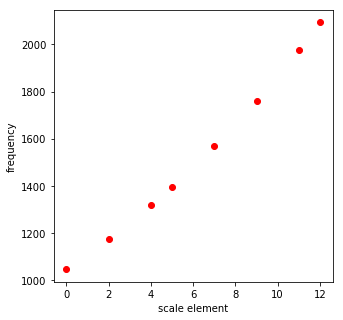

In [24]:
fig = plt.figure(figsize=(5,5))
plt.plot(major,f, 'ro')
plt.xlabel('scale element')
plt.ylabel('frequency')
plt.show()

### Just intonation (sounds better !?!?)
When a musical instrument is tuned using a just intonation tuning system, the size of the main intervals can be expressed by small-integer ratios, such as 1:1 (unison), 2:1 (octave), 3:2 (perfect fifth), 4:3 (perfect fourth), 5:4 (major third), 6:5 (minor third).
then sort by increasing value! 

In [25]:
top = np.array([2.,3.,4.,5.,6.])
bot = top-1 
just_ratios = top/bot

print('the ratios of just intonation for octave, fifth, fourth, major third, minor third:')
print(just_ratios)

print('rearranged to minor third, major third, fourth, fifth, octave:')
scale3458_just = np.sort(just_ratios)
print(scale3458_just)

print('add the root note:')
scale13m3M458_just = np.append(1, scale3458_just)
print(scale13m3M458_just)

print('compare to the equal tempered ratios:')
ints13m3M458_eqt = np.array([0.,3.,4.,5.,7.,12.])
scale13m3M458_eqt = 2**(ints13m3M458_eqt/12.)
print(scale13m3M458_eqt)

print('Can we hear the difference?')

the ratios of just intonation for octave, fifth, fourth, major third, minor third:
[ 2.          1.5         1.33333333  1.25        1.2       ]
rearranged to minor third, major third, fourth, fifth, octave:
[ 1.2         1.25        1.33333333  1.5         2.        ]
add the root note:
[ 1.          1.2         1.25        1.33333333  1.5         2.        ]
compare to the equal tempered ratios:
[ 1.          1.18920712  1.25992105  1.33483985  1.49830708  2.        ]
Can we hear the difference?


<type 'numpy.ndarray'>
1.11111111111
[  0.           1.11111111   2.22222222   3.33333333   4.44444444
   5.55555556   6.66666667   7.77777778   8.88888889  10.        ]


/Users/aribakhan/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  # Remove the CWD from sys.path while we load stuff.
/Users/aribakhan/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  # This is added back by InteractiveShellApp.init_path()


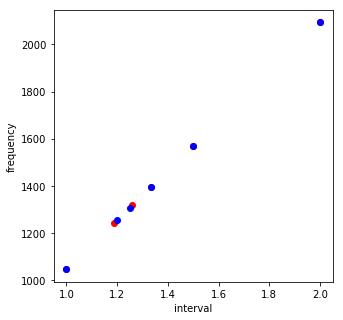

In [26]:
# CONVERT THOSE RATIOS TO FREQUENCIES !
f0 = 1046.50
f_133458_just = f0*scale13m3M458_just
f_133458_eqt = f0*scale13m3M458_eqt
print(type(f_133458_eqt))

# delete the major or minor thirds
min_ind = 1.
maj_ind = 2.
f_13458_eqt = np.delete(f_133458_eqt,[min_ind])  #np.delete(values,[3,4,1])
f_13458_just = np.delete(f_133458_just,[min_ind]) 

freqs = np.concatenate((f_13458_just,f_13458_eqt))
# MAKE a TIME array ! 
# use arange for integers !
# use linspace for non-integer increments
sound_dur = 10.0
time = np.linspace(0,sound_dur,len(freqs)) 
dur = time[2] - time[1]
print(dur)
print(time)

fig = plt.figure(figsize=(5,5))
plt.plot(scale13m3M458_eqt,f_133458_eqt, 'ro')
plt.plot(scale13m3M458_just,f_133458_just, 'bo')
plt.xlabel('interval')
plt.ylabel('frequency')
plt.show()

# ===============================================
# (2) Visualizing tonal relationships ! 

In [27]:
n_oct = 2.
n_ints_scl = 24.
pitches = np.arange(n_oct*n_ints_scl+1.)
print(pitches)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.]


In [28]:
f0 = 1046.50
k = pitches
freqs = f0*2**(k/12.)
print(freqs)

[  1046.5          1108.72812825   1174.65653356   1244.50524585
   1318.50737871   1396.90990739   1479.97449302   1567.97835595
   1661.21520088   1759.99619713   1864.65101707   1975.52893644   2093.
   2217.45625649   2349.31306711   2489.0104917    2637.01475743
   2793.81981478   2959.94898605   3135.9567119    3322.43040177
   3519.99239425   3729.30203414   3951.05787289   4186.           4434.91251299
   4698.62613422   4978.0209834    5274.02951486   5587.63962956
   5919.89797209   6271.91342381   6644.86080354   7039.9847885
   7458.60406827   7902.11574577   8372.           8869.82502598
   9397.25226845   9956.0419668   10548.05902972  11175.27925911
  11839.79594419  12543.82684761  13289.72160708  14079.96957701
  14917.20813654  15804.23149154  16744.        ]


In [29]:
v = -1.0 # octave shift down from root (tonic) #starting key
freqs = f0*2**(v+k/12)

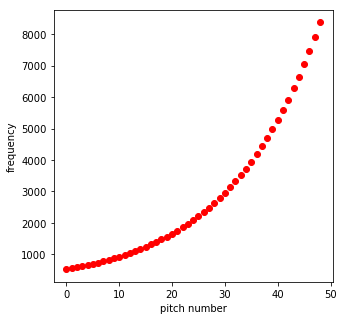

In [30]:
fig = plt.figure(figsize=(5,5))
plt.plot(pitches,freqs, 'ro')
plt.xlabel('pitch number')
plt.ylabel('frequency')
plt.show()

# =============================================================================
# (3) PITCH WHEELS

In [31]:
import matplotlib.patches as patches

def makePitchRing(indexes):
    circle = np.linspace(0,2*np.pi,64)
    r = 1.0
    x = r*np.sin(circle)
    y = r*np.cos(circle)

    # the note locations. 
    base_dots = np.linspace(0,2*np.pi,13)
    xd = r*np.sin(base_dots)
    yd = r*np.cos(base_dots)

    # the text locations
    r = 1.15
    xt = r*np.sin(base_dots)
    yt = r*np.cos(base_dots)

    # ========================
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111, aspect='equal')

    # (0) plot a filled square with a filled circle in it...
    # patches.Rectangle((x,y,lower left corner),width,height)
    #ax1.add_patch(patches.Rectangle((0.1, 0.1),0.5,0.5,facecolor="red"))

    ax1.add_patch(patches.Rectangle((-1.25, -1.25),2.5,2.5,facecolor=[0.6, 0.6, 0.6]))
    ax1.plot(x,y,'k-')
    ax1.plot(xd,yd,'w.')

    radius_norm = 0.08  # radius normalized, scaled to size of box

    for ind,interval in enumerate(indexes):
        # print(ind,interval)
        ax1.add_patch(patches.Circle((xd[interval], yd[interval]),radius_norm,facecolor="red")) 
        ax1.text(xt[interval], yt[interval],pitch_classes[interval])
        
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    plt.show()


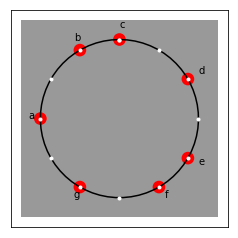

In [32]:
pitch_classes = ['c','c#','d','d#','e','f','f#','g','g#','a','a#','b']
indexes = [0,2,4,5,7,9,11]
makePitchRing(indexes)

In [252]:
# Now lets make a sort of data base for pitches... 
# to connect names to pitches, 
# and 

C6 = 440.0 * 2**(27./12.-1.)
print(C6)

def notenum2freq(k,v,f0):
    freqs = f0*2**(v+k/12.)
    return freqs

ints = np.arange(12)
print(ints)
ref_scale_freqs = notenum2freq(ints,0,C6)
print(ref_scale_freqs)

1046.5022612
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 1046.5022612   1108.73052391  1174.65907167  1244.50793489  1318.51022765
  1396.91292573  1479.97769085  1567.98174393  1661.21879032  1760.
  1864.65504607  1975.53320502]


In [225]:
# using dictionaries: 
# https://learnpythonthehardway.org/book/ex39.html
# https://jeffknupp.com/blog/2015/08/30/python-dictionaries/

# a list of dictionaries: 
# http://stackoverflow.com/questions/19577258/python-analog-to-matlab-data-structure
# database.append({'E': 17e4, 'var2': 'C:\\data file path', 'var3': [1, 2, 3, 4]})
pitch_classes = ['c','c#','d','d#','e','f','f#','g','g#','a','a#','b']

# does it make any sense to make a dictionary here?
#pitches_midC_ref = {'pitches':pitch_classes, 'freqs':ref_scale_freqs }
#pitch_names = pitches_midC_ref['pitches']
#freqs = pitches_midC_ref['freqs']


In [226]:
for pair in zip(pitch_classes,ref_scale_freqs):
    print(pair)

for ind,pitchname in enumerate(pitch_classes):
    print(pitchname + ' : ' + str(ref_scale_freqs[ind]) + 'Hz')
    

('c', 1046.5022612023945)
('c#', 1108.7305239074883)
('d', 1174.6590716696303)
('d#', 1244.5079348883235)
('e', 1318.5102276514797)
('f', 1396.9129257320155)
('f#', 1479.9776908465376)
('g', 1567.9817439269971)
('g#', 1661.2187903197803)
('a', 1759.9999999999998)
('a#', 1864.6550460723595)
('b', 1975.5332050244963)
c : 1046.5022612Hz
c# : 1108.73052391Hz
d : 1174.65907167Hz
d# : 1244.50793489Hz
e : 1318.51022765Hz
f : 1396.91292573Hz
f# : 1479.97769085Hz
g : 1567.98174393Hz
g# : 1661.21879032Hz
a : 1760.0Hz
a# : 1864.65504607Hz
b : 1975.53320502Hz


In [227]:
# or make a dictionary ! 
pitch_freq_ref = dict(zip(pitch_classes,ref_scale_freqs))

pitch_freq_ref
print(pitch_freq_ref)


{'a': 1759.9999999999998, 'c': 1046.5022612023945, 'b': 1975.5332050244963, 'e': 1318.5102276514797, 'd': 1174.6590716696303, 'g': 1567.9817439269971, 'f': 1396.9129257320155, 'c#': 1108.7305239074883, 'd#': 1244.5079348883235, 'f#': 1479.9776908465376, 'g#': 1661.2187903197803, 'a#': 1864.6550460723595}


In [228]:
# is this actually C4 ? 
print('============== CALL ONE PITCH NAME ============')
C6 = pitch_freq_ref['c']
print('C6 = '+ str(C6))

============== CALL ONE PITCH NAME ============
C6 = 1046.5022612


# =============================================
# (4) Modes -- Dictionaries and lists

In [229]:
# NOW LETS MAKE DICTIONARIES FOR THE MODES !! 

modes = {
    'ionian':[2,2,1,2,2,2,1], #major scale
    'dorian':[2,1,2,2,2,1,2], #minor scale
    'phrygian':[1,2,2,2,1,2,2],
    'lydian':[2,2,2,1,2,2,1],
    'mixolydian':[2,2,1,2,2,1,2],
    'aeolian':[2,1,2,2,1,2,2],
    'lochrian':[1,2,2,1,2,2,2]
}

print(len(modes))

7


In [272]:
# calculate the elements of the scale from the intervals (a sort of integral): 

intervals = modes['ionian']
intervals1 = modes['mixolydian']
print(intervals)
print(intervals1)
x = np.cumsum(intervals)
y = np.cumsum(intervals1)
print(x)
print(y)
indexes2 = []
indexes3 = []
for val in x[:-1]:
    indexes2.append(val)
for val1 in y[:-1]:
    indexes3.append(val1)
final_indexes = indexes2 + [12] + indexes3 + [12]
final_indexes = np.array(final_indexes)
print(final_indexes)

[2, 2, 1, 2, 2, 2, 1]
[2, 2, 1, 2, 2, 1, 2]
[ 2  4  5  7  9 11 12]
[ 2  4  5  7  9 10 12]
[ 2  4  5  7  9 11 12  2  4  5  7  9 10 12]


In [231]:
final_index = [None]*(len(indexes2)+len(indexes3))
final_index[::2] = indexes2
final_index[1::2] = indexes3
print(final_index)
final_index = np.array(final_index)

[2, 2, 4, 4, 5, 5, 7, 7, 9, 9, 11, 10]


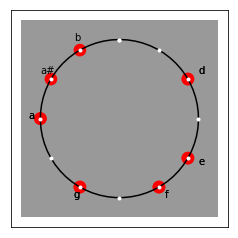

In [232]:
makePitchRing(final_index)


# =======================================================================
# (5) Generating Beeps ! 

In [233]:
# define the function for making the ENVELOPE
#  peak position [0,1] 
def make_envelope_3pt(y,peak_posn):
    N = len(y)
    envelope = np.zeros(N)
    print(envelope.shape)
    peak = int(N*peak_posn)
    print(peak)

    # from 0 to the peak index (peak):
    up = np.linspace(0,1,peak)
    print(up.shape)
    envelope[:peak] = up

    # and fill in the rest: 
    down = np.linspace(1,0,(N-peak))
    print(down.shape)
    envelope[peak:] = down
    
    return envelope

# there is a much shorter and more elegant way to do this, actually many ! 
# make one using np.interp with the time vector of the signal to modulate! 

In [234]:
# define the function for MAKING THE BEEP, then taking in the envelope
# inputs f, dur

def make_oscillator(f,dur):
    n_cycles = f*dur # [cycles/sec]*[sec]
    fs = 55200 # just make it at 44100.. why not?! 
    npts = int(fs*dur)
    
    time = np.linspace(0,dur,npts)
    env = np.interp(time, [0,0.05*dur,0.95*dur,dur], [0,1,1,0])
    x = np.linspace(0,2*np.pi*n_cycles,npts)
    y = np.sin(x)
    y = env*y
    return time,y


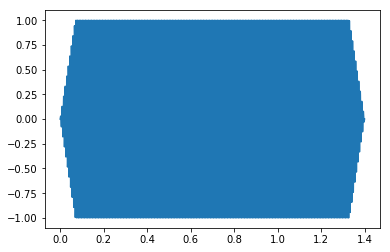

In [235]:
f = 140.0
dur = 1.4
time,y = make_oscillator(f,dur)
plt.plot(time,y)

In [236]:
# loop over the scale to generate the beep sequence
# CONVERT THOSE RATIOS TO FREQUENCIES !
C6 = pitch_freq_ref['c']
print('C6 = '+ str(C6))

f0 = C6
f_133458_just = f0*scale13m3M458_just
f_133458_eqt = f0*scale13m3M458_eqt
print(type(f_133458_eqt))

# delete the major or minor thirds
min_ind = 1
maj_ind = 2
f_13458_eqt = np.delete(f_133458_eqt,[min_ind]) 
f_13458_just = np.delete(f_133458_just,[min_ind]) 

freqs = np.concatenate((f_13458_just,f_13458_eqt))
print(f_13458_just)
print(f_13458_eqt)

C6 = 1046.5022612
<type 'numpy.ndarray'>
[ 1046.5022612   1308.1278265   1395.33634827  1569.7533918   2093.0045224 ]
[ 1046.5022612   1318.51022765  1396.91292573  1567.98174393  2093.0045224 ]


In [237]:
dur = 2.2

waveform = np.zeros(1)
for ff in freqs:
    time,y = make_oscillator(ff,dur)
    beep = y
    waveform = np.hstack((waveform,beep))

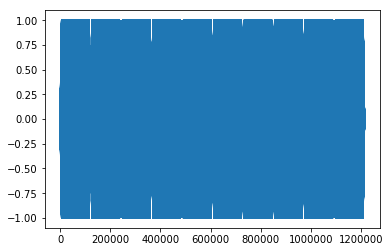

In [238]:
plt.plot(waveform)

In [239]:
DirOut = '../3_output_nogit/'
OutFileName = 'PRAC_scales1_noRT.wav'
fs_sound = 44100
librosa.output.write_wav(DirOut + OutFileName, waveform, fs_sound, norm=False)

# ==========================================================
# (6) generating RTcmix scores from simple lists of pitches
### same as above but with RTcmix

In [240]:
# FUNCTION FOR GENERATING THE RTcmix score ! 

def makeSimpleScore(base_name,time,freqs):
    # ====================
    score_name = base_name + '.sco'
    print(score_name)
    f_out = open("./" + score_name , 'w')
    # YOU MUST DELETE THE SOUND FILE BEFORE RUNNING (either with python or with -clobber )
    f_out.write("set_option(\"clobber = on\")")

    f_out.write("rtsetparams(44100, 1)\n") #sample rate, channels (1= monosound, 2 = stereo)
    f_out.write("load(\"WAVETABLE\")\n")

    # output_string = 'rtoutput(\"' + base_name + '.wav\")\n'  
    # don't need the brackets to make it an array ! 
    # f_out.write(output_string)

    #----------------------CHECK IF CMIX COMMAND IS INSTALLED-----------------------
    #only use rtoutput if CMIX command is found.
    cmixStatus, cmixResult = commands.getstatusoutput("CMIX")
    #the cmixInstalled variable can also be passed from the notebook
    #in that is case, the output of sp.getstatusoutput("CMIX") is overridden

    if cmixInstalled:
        cmixStatus = 0
    else:
        cmixStatus = 127

    if cmixStatus == 0:
        output_string = 'rtoutput(\"' + base_name + '.wav\")\n'
        # don't need the brackets to make it an array !
        print("CMIX found.")
        print(output_string)
        f_out.write(output_string)
    else:
        print("CMIX not found; rtoutput() will not be used in score.")
    #-------------------------------------------------------------------------------
    
    f_out.write("waveform = maketable(\"wave\", 1000, 1.0, 0.6, 0.3)\n") #sinewave,length (points),overtones
    # to add overtones, just add amplitude weights
    #f_out.write("waveform = maketable(\"wave\", 1000, 1.0, 0.4, 0.2)\n")

    f_out.write("ampenv = maketable(\"window\", 1000, \"hamming\")\n")  #envelope (wherever you have an amplitude it will multiply by envelope)

    # write out the score ! 
    # (start time, duration, amplitude, frequency, channel mix [0 left, 1.0 right],
    # table_handle (which waveform to use)

    # for now, constants: 
            
    # reset(44100) makes it very very smooth... 
            
    amp = 10000 
    mix = 1.0 # 0 = left, 1 = right, but here just 1 channel
    tab_han = 'waveform'

    for i,freq_val in enumerate(freqs): #enumerate gives you value and index
        t_start = time[i]
        # dur = durations[i]-- here, constant, defined above
        dur = 1.4
        freq = freq_val
        note_string = 'WAVETABLE(' + str(t_start) + ', ' \
                  + str(dur)  + ', ' + str(amp)+ '*ampenv' + ', ' \
                  + str(freq)  + ', ' + str(mix)  + ', ' \
                  +  tab_han + ')\n' 
        f_out.write(note_string)
        
    f_out.close()
    return score_name



In [305]:
# Make freqs and time arrays (same length!)
freqs = np.concatenate((f_13458_just*0.5,f_13458_eqt*0.5))
freqs1 = np.concatenate((f_13458_just*0.5,f_13458_eqt*0.5))

freqs_alternate = [None]*(len(freqs)+len(freqs1))
freqs_alternate[::2] = freqs
freqs_alternate[1::2] = freqs1

freqs_reverse = freqs_alternate[::-1]
freqs_final = freqs_alternate + freqs_reverse
print(freqs_final)

beepdur = 0.9
sound_dur = len(freqs_final)*beepdur*.6
time_sco = np.linspace(0,sound_dur,len(freqs_final))
print(len(freqs_final),len(time_sco))
print(time_sco)

[523.25113060119725, 523.25113060119725, 654.06391325149661, 654.06391325149661, 697.66817413492959, 697.66817413492959, 784.87669590179587, 784.87669590179587, 1046.5022612023945, 1046.5022612023945, 523.25113060119725, 523.25113060119725, 659.25511382573984, 659.25511382573984, 698.45646286600777, 698.45646286600777, 783.99087196349853, 783.99087196349853, 1046.5022612023945, 1046.5022612023945, 1046.5022612023945, 1046.5022612023945, 783.99087196349853, 783.99087196349853, 698.45646286600777, 698.45646286600777, 659.25511382573984, 659.25511382573984, 523.25113060119725, 523.25113060119725, 1046.5022612023945, 1046.5022612023945, 784.87669590179587, 784.87669590179587, 697.66817413492959, 697.66817413492959, 654.06391325149661, 654.06391325149661, 523.25113060119725, 523.25113060119725]
(40, 40)
[  0.           0.55384615   1.10769231   1.66153846   2.21538462
   2.76923077   3.32307692   3.87692308   4.43076923   4.98461538
   5.53846154   6.09230769   6.64615385   7.2          7.7

In [306]:
# GENERATE THE RTcmix score ! 
base_name = 'PRAC_scale1_RT'
score_name = makeSimpleScore(base_name,time_sco,freqs_final)



PRAC_scale1_RT.sco
CMIX not found; rtoutput() will not be used in score.


In [1]:
# play RTcmix score and create a wave file
# use CMIX if installed; if not, use pyGoRTcmix
abitextra = 0.5
dur_sound = time_sco[-1] + abitextra 

if cmixInstalled:
    cmix_cmd = 'CMIX < ' + base_name + '.sco'
else:
    dur = str(dur_sound)
    cmix_cmd = '/Users/aribakhan/Desktop/Sonification_Data/datamovies-master/pyGoRTcmix/pyGoRTcmix -inputscore ' + os.path.abspath(base_name + '.sco ') + '-output ' + os.path.abspath(base_name + '.wav ') +'-dur ' + dur
print(cmix_cmd)

runCMIX = sp.Popen(cmix_cmd, shell=True) # if can only be called from a shell, use shell=True

runCMIX.wait()
print('\nhopefully i just wrote your sound file (' + base_name + '.wav); is it here?')
! ls *.wav

NameError: name 'time_sco' is not defined

In [244]:
move_cmd = 'mv ' + base_name + '.* ../3_output_nogit/'
sp.Popen(move_cmd, shell=True)

In [274]:
# EXERCISE:  MAKE AN RTCMIX SCORE FROM THIS... 
base_name = 'PRAC_ionian+mixolydian'
# pluck freqs out of the scale... or calculate freqs with k ? 
freqs = notenum2freq(final_index,0,C6)
print(freqs)
freqs1 = notenum2freq(indexes3,0,C6)
#print(freqs1)
#final_freqs = [None]*(len(freqs)+len(freqs1))
#final_freqs[::2] = freqs
#final_freqs[1::2] = freqs1
#print(final_freqs)

#time2 = np.linspace(0,10,len(indexes2))
#time3 = np.linspace(0,10,len(indexes3))
#makeSimpleScore(base_name,time2,freqs)
#makeSimpleScore(base_name1,time3,freqs1)

[ 1174.65907167  1174.65907167  1318.51022765  1318.51022765  1396.91292573
  1396.91292573  1567.98174393  1567.98174393  1760.          1760.
  1975.53320502  1864.65504607]


TypeError: unsupported operand type(s) for /: 'list' and 'float'

In [89]:
abitextra = 0.5
dur_sound = time_sco[-1] + abitextra 

if cmixInstalled:
    cmix_cmd = 'CMIX < ' + base_name + '.sco'
else:
    dur = str(dur_sound)
    cmix_cmd = '/Users/aribakhan/Desktop/Sonification_Data/datamovies-master/pyGoRTcmix/pyGoRTcmix -inputscore ' + os.path.abspath(base_name + '.sco ') + '-output ' + os.path.abspath(base_name + '.wav ') +'-dur ' + dur
print(cmix_cmd)

runCMIX = sp.Popen(cmix_cmd, shell=True) # if can only be called from a shell, use shell=True

runCMIX.wait()
print('\nhopefully i just wrote your sound file (' + base_name + '.wav); is it here?')
! ls *.wav

/Users/aribakhan/Desktop/Sonification_Data/datamovies-master/pyGoRTcmix/pyGoRTcmix -inputscore /Users/aribakhan/Desktop/Sonification_Data/datamovies-master/1_codes/PRAC_ionian.sco -output /Users/aribakhan/Desktop/Sonification_Data/datamovies-master/1_codes/PRAC_ionian.wav -dur 22.5

hopefully i just wrote your sound file (PRAC_ionian.wav); is it here?
PRAC_ionian.wav scale1_RT 2.wav scale1_RT 4.wav sound_env1.wav
ionian.wav      scale1_RT 3.wav sound_env.wav


In [ ]:
move_cmd = 'mv ' + base_name + '.* ../3_output_nogit/'
sp.Popen(move_cmd, shell=True)

In [58]:
# EXERCISE:  CHANGE THE NOTE OF THE SCALE ! 


In [ ]:
# EXERCISE: STRING TOGETHER A SERIES OF SCALES, LOOPING OVER ONE THING TO CHANGE, 
# such as root note or mode... and make a longer RTcmix score... 

### (7) Circles of 5ths and 4ths... 
### (8) More considerations for composing from data.. chords... key changes, microtonal scales... 